### Import depencies


In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler




In [22]:

#read in data
pollution_data = pd.read_csv(r"C:\Users\marlo\OneDrive\Desktop\Coding\PRSA_data_2010.1.1-2014.12.31.csv")

#view data
print(pollution_data.head())

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [23]:
#drop date columns
pollution_data = pollution_data.drop(columns=[ 'year', 'month', 'day', 'hour'], axis=1)

### Experiment 1: Data understanding

In [24]:
#check for missing values
print(pollution_data.isnull().sum())

#view data types and structure
print(pollution_data.info())

No          0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   pm2.5   41757 non-null  float64
 2   DEWP    43824 non-null  int64  
 3   TEMP    43824 non-null  float64
 4   PRES    43824 non-null  float64
 5   cbwd    43824 non-null  object 
 6   Iws     43824 non-null  float64
 7   Is      43824 non-null  int64  
 8   Ir      43824 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.0+ MB
None


In [25]:
#view column names
pollution_data.columns

Index(['No', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

<Axes: xlabel='DEWP', ylabel='pm2.5'>

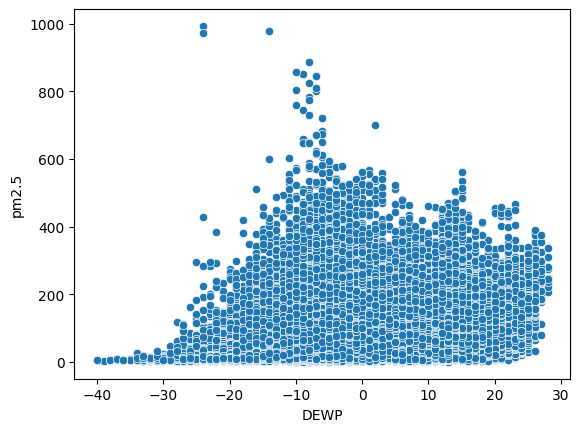

In [26]:
# plot multiple  plots looking for correlations
sns.scatterplot(data=pollution_data, x='DEWP', y='pm2.5')


<Axes: xlabel='TEMP', ylabel='DEWP'>

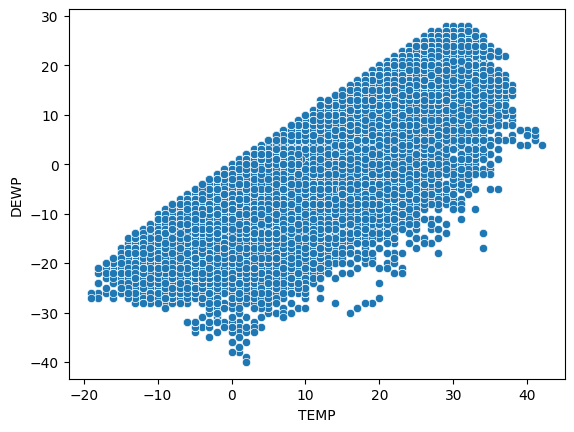

In [27]:
sns.scatterplot(data=pollution_data, x='TEMP', y='DEWP')


<Axes: xlabel='PRES', ylabel='pm2.5'>

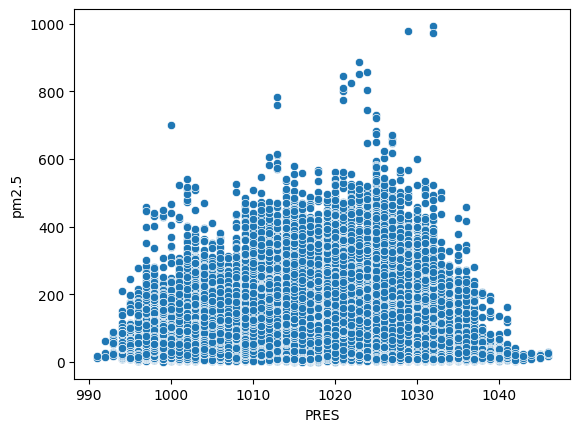

In [28]:
sns.scatterplot(data=pollution_data, x='PRES', y='pm2.5')


<Axes: xlabel='Ir', ylabel='pm2.5'>

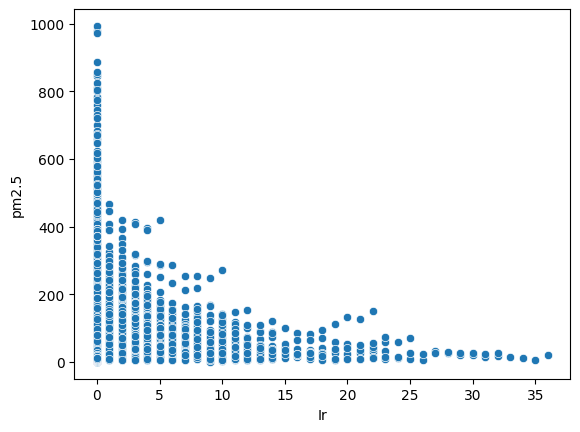

In [29]:
sns.scatterplot(data=pollution_data, x='Ir', y='pm2.5')


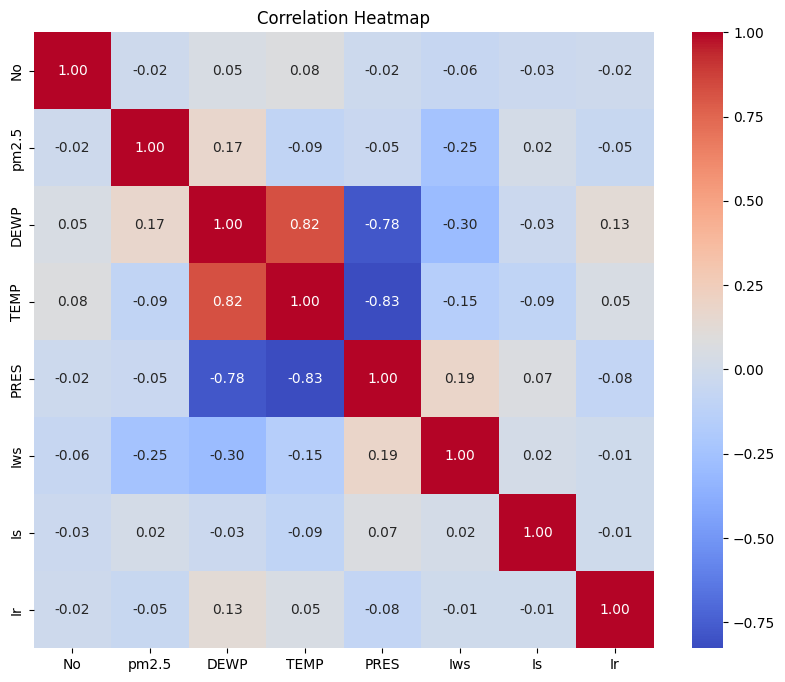

In [30]:
#show correlations through a heatmap
plt.figure(figsize=(10,8))
numeric_data = pollution_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


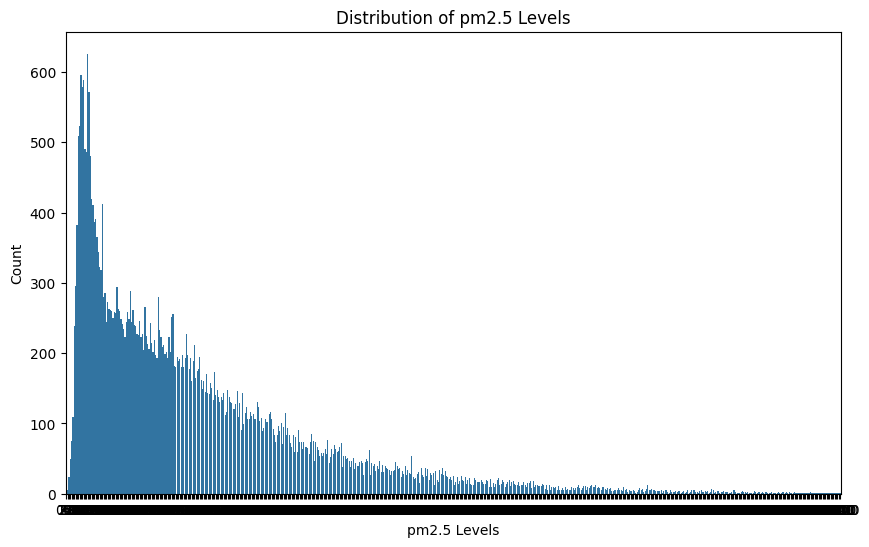

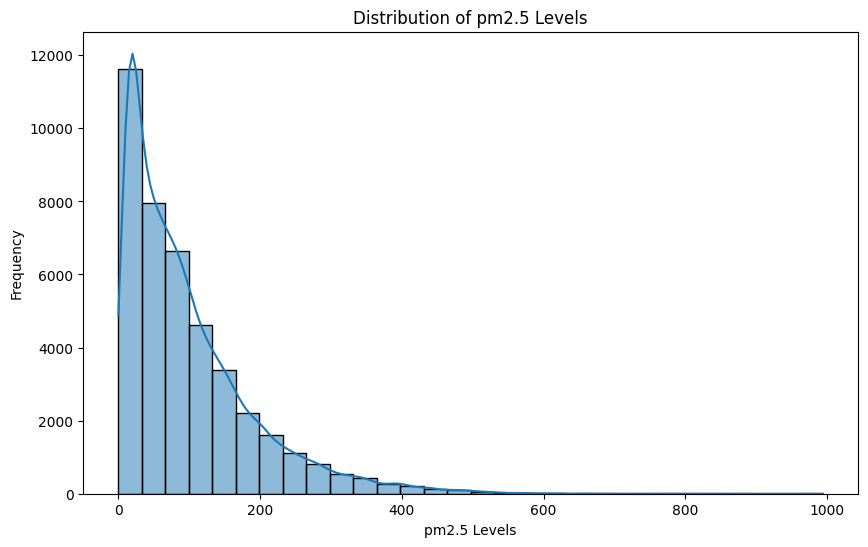

In [31]:
#check data for balance
plt.figure(figsize=(10,6))
sns.countplot(data=pollution_data, x='pm2.5')
plt.title('Distribution of pm2.5 Levels')
plt.xlabel('pm2.5 Levels')
plt.ylabel('Count')
plt.show()

#check again
plt.figure(figsize=(10,6))
sns.histplot(pollution_data['pm2.5'], bins=30, kde=True )
plt.title('Distribution of pm2.5 Levels')
plt.xlabel('pm2.5 Levels')
plt.ylabel('Frequency')
plt.show()



### Experiment 1: Pre-processing


In [32]:
#drop record/wind direction column
pollution_data = pollution_data.drop(columns=['No'])
pollution_data = pollution_data.drop(columns=['cbwd'])

#check for missing values
print(pollution_data.isnull().sum())

#view data types and structure
print(pollution_data.info())



pm2.5    2067
DEWP        0
TEMP        0
PRES        0
Iws         0
Is          0
Ir          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   41757 non-null  float64
 1   DEWP    43824 non-null  int64  
 2   TEMP    43824 non-null  float64
 3   PRES    43824 non-null  float64
 4   Iws     43824 non-null  float64
 5   Is      43824 non-null  int64  
 6   Ir      43824 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 2.3 MB
None


In [36]:
#handle missing values by filling with mean
pollution_data['pm2.5'] = pollution_data['pm2.5'].fillna(pollution_data['pm2.5'].mean())

pollution_data.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,98.613215,-21,-11.0,1021.0,1.79,0,0
1,98.613215,-21,-12.0,1020.0,4.92,0,0
2,98.613215,-21,-11.0,1019.0,6.71,0,0
3,98.613215,-21,-14.0,1019.0,9.84,0,0
4,98.613215,-20,-12.0,1018.0,12.97,0,0


## Experiment 1: Linear Regression

In [37]:
X = pollution_data.drop(columns=['pm2.5', 'Is', 'Ir'], axis=1)
y = pollution_data['pm2.5']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 6459.935057966294
R^2 Score: 0.20833733880144922
